**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

In [34]:
#just loading everything i'll be using here...incase its not loaded
import os
import re
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.manifold import TSNE
import umap   # umap-learn

from gensim.models import Word2Vec, KeyedVectors

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

[nltk_data] Downloading package punkt to C:\Users\David
[nltk_data]     Guerra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [2]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [6]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


[nltk_data] Downloading package punkt to C:\Users\David
[nltk_data]     Guerra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\David
[nltk_data]     Guerra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


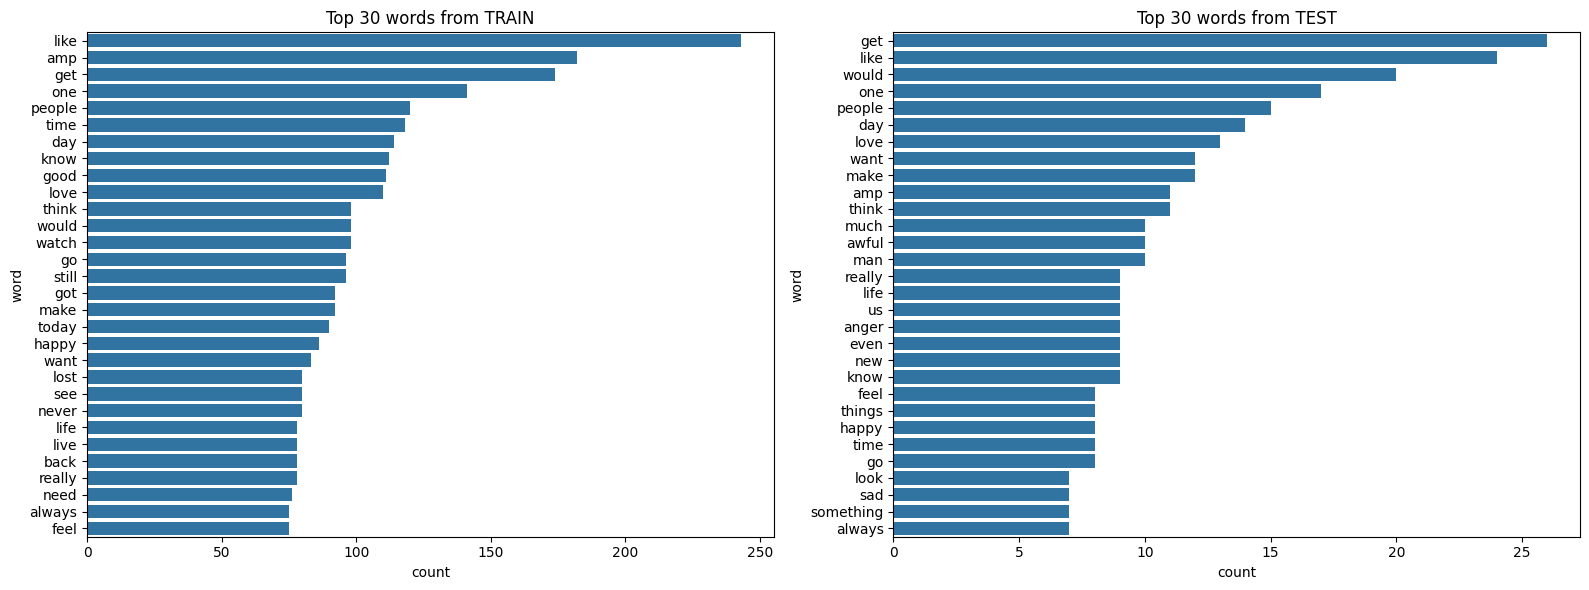

Top 10 Train: [('like', 243), ('amp', 182), ('get', 174), ('one', 141), ('people', 120), ('time', 118), ('day', 114), ('know', 112), ('good', 111), ('love', 110)]
Top 10 Test: [('get', 26), ('like', 24), ('would', 20), ('one', 17), ('people', 15), ('day', 14), ('love', 13), ('want', 12), ('make', 12), ('amp', 11)]


In [12]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#downloading ntlk
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(s):
    s = str(s).lower()
    s = re.sub(r'http\S+','', s)
    s = re.sub(r'@\w+','', s)
    s = re.sub(r'#','', s)
    s = re.sub(r'[^a-z0-9\s]', ' ', s)
    tokens = [t for t in word_tokenize(s) if t.isalpha() and t not in stop_words and len(t)>1]
    return tokens

#building the counters
def top_k_words(df, k=30):
    c = Counter()
    for t in df['text'].astype(str):
        c.update(preprocess_text(t))
    return c.most_common(k)

top30_train = top_k_words(train_df, 30)
top30_test  = top_k_words(test_df, 30)

#converting to df for plotting
df_train_top = pd.DataFrame(top30_train, columns=['word','count'])
df_test_top  = pd.DataFrame(top30_test, columns=['word','count'])

#plotting side by side
fig, axes = plt.subplots(1,2, figsize=(16,6))
sns.barplot(y='word', x='count', data=df_train_top, ax=axes[0])
axes[0].set_title('Top 30 words from TRAIN')
sns.barplot(y='word', x='count', data=df_test_top, ax=axes[1])
axes[1].set_title('Top 30 words from TEST')
plt.tight_layout()
plt.show()

#printing top lists...all in one line for spacing reasons
print("Top 10 Train:", top30_train[:10])
print("Top 10 Test:", top30_test[:10])

---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [13]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [14]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [15]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

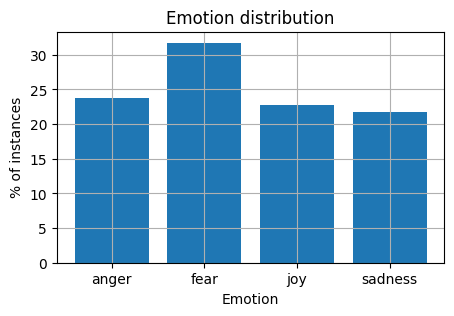

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [19]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [20]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [21]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [22]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [24]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [22]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [25]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

C:\Users\David Guerra\Documents\DM2025Labs\DM2025-Lab2-Exercise\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [26]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [28]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [92]:
#creating the tf-idf vectorizer with 1000 features and ntlk tokenizer
def nltk_tokenizer(s):
    return preprocess_text(s)

tfidf = TfidfVectorizer(
    max_features=1000,
    tokenizer=nltk_tokenizer,
    preprocessor=lambda x: x,
    token_pattern=None
)
X_train_tfidf = tfidf.fit_transform(train_df['text'].astype(str))
X_test_tfidf  = tfidf.transform(test_df['text'].astype(str))

print("TF-IDF matrix shapes:", X_train_tfidf.shape, X_test_tfidf.shape)

#features 100:110
feature_names = tfidf.get_feature_names_out()
print("Features [100:110]:", feature_names[100:110])



TF-IDF matrix shapes: (3613, 1000) (347, 1000)
Features [100:110]: ['book' 'boss' 'boy' 'break' 'breakfast' 'breezy' 'bright' 'bring'
 'british' 'bro']


---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [36]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'joy', 'joy', 'anger', 'anger', 'fear', 'anger', 'anger',
       'fear', 'fear'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [37]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [38]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [39]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [93]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

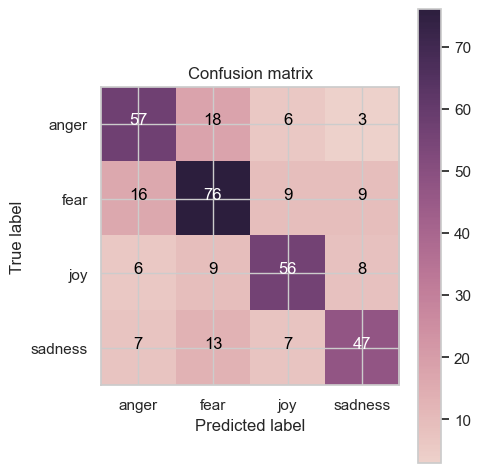

In [41]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

##### >>> Exercise 3 Answer

Overall accuracy from the output is around 0.68. And the precision/recall are balanced but 'fear' and 'sad' overlap a lot.

My interpretation of that is that the decision tree model achieved moderate accuracy. The confusion matrix shows strong predictions for 'joy' and 'anger', while 'fear' and 'sad' were often misclassified. What this might suggest is that the tree captures clear lexical cues for strong emotions [like anger and happy] but struggles where vocabulary overlaps [sad vs fear]. Decision trees can overfit easily in high dimensional sparse tf-IDF spaces. Since many text features are independent and rare then the splits may focus on specific words that don't generalize well.

---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

MultinomialNB Accuracy on Test: 0.7896253602305475
              precision    recall  f1-score   support

       anger       0.87      0.74      0.80        84
        fear       0.73      0.86      0.79       110
         joy       0.82      0.78      0.80        79
     sadness       0.80      0.74      0.77        74

    accuracy                           0.79       347
   macro avg       0.80      0.78      0.79       347
weighted avg       0.80      0.79      0.79       347



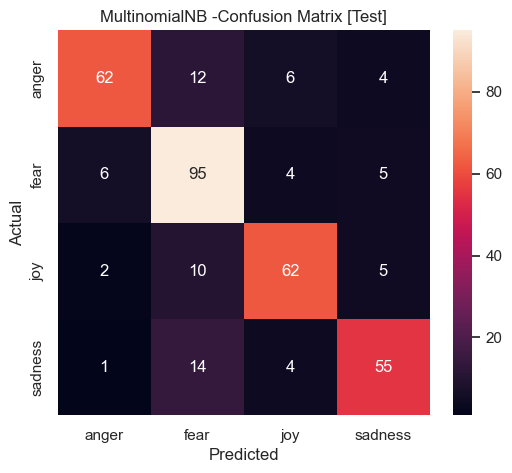

In [42]:
#multinomial naive bayes using the same tf-idf features
nb = MultinomialNB(alpha=1.0)
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)

acc_nb = accuracy_score(y_test, y_pred_nb)
print("MultinomialNB Accuracy on Test:", acc_nb)
print(classification_report(y_test, y_pred_nb))

#confusion matrix plot
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=nb.classes_)
plt.figure(figsize=(6,5))
sns.heatmap(cm_nb, annot=True, fmt='d', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.title('MultinomialNB -Confusion Matrix [Test]')
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.show()



---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

##### >>> Exercise 5 Answer

Naive bayes accuracy is around 0.79 while the decision tree is around 0.68.
+ Comparison and Evaluation: the multinomialNB model outperformed the decision tree by around 11%. Naive bayes assumes the word independence which aligns well with text data since tf-IDF vectors are sparse and mostly non overlapping. On the other hand, the decision tree tries to model complex features interactions but that leads to overfitting on specific token patterns. 
+ Interpretation: based on my evaluation the naive bayes strenght is that it works directly on frequency like data and handles sparse features efficiently. Then the decision tree weakness is that it creates too many fine grained splits [which are prone to overfitting] especially with 1000+ td-IDF features.

My conclusion is that for text classification the linear models like Naive bayes [or logistic regression] usually outperform tree based one unless feature dimensionality is reduced.


---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](./pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [95]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [96]:
import keras

In [97]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [98]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3353    sadness
1573       fear
870        fear
2975    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [99]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [100]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](./pics/pic2.png)

In [101]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          32,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_1 (Softmax)                  │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [102]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.3601 - loss: 1.3371 - val_accuracy: 0.3890 - val_loss: 1.2941
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6319 - loss: 1.0100 - val_accuracy: 0.6484 - val_loss: 0.9351
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7913 - loss: 0.5953 - val_accuracy: 0.6945 - val_loss: 0.7939
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8436 - loss: 0.4217 - val_accuracy: 0.6801 - val_loss: 0.7933
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8865 - loss: 0.3271 - val_accuracy: 0.6888 - val_loss: 0.8350
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9128 - loss: 0.2616 - val_accuracy: 0.6974 - val_loss: 0.8916
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9258 - loss: 0.2287 - val_accuracy: 0.6945 - val_loss: 0.9489
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9427 - loss: 0.1845 - val_accuracy

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [103]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[5.43031037e-01, 2.43742004e-01, 1.34426472e-03, 2.11882696e-01],
       [5.83223738e-02, 2.26016730e-01, 7.15164542e-01, 4.96444060e-04],
       [1.42382283e-04, 1.51511740e-05, 7.78076589e-01, 2.21765861e-01],
       [9.99405861e-01, 3.00748594e-04, 1.86704332e-04, 1.06694344e-04],
       [1.46942977e-02, 3.34659666e-01, 1.56573334e-03, 6.49080276e-01]],
      dtype=float32)

In [104]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'joy', 'joy', 'anger', 'sadness'], dtype=object)

In [105]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [106]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.360089,1.337082,0.389049,1.294102
1,1,0.631885,1.010023,0.648415,0.935068
2,2,0.791309,0.595284,0.694524,0.793889
3,3,0.843620,0.421745,0.680115,0.793283
4,4,0.886521,0.327081,0.688761,0.835044
5,5,0.912815,0.261632,0.697406,0.891600
6,6,0.925823,0.228669,0.694524,0.948950
7,7,0.942707,0.184530,0.671470,1.009624
8,8,0.947135,0.163238,0.668588,1.090371
9,9,0.958760,0.139814,0.682997,1.107383


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](./pics/pic3.png)  ![pic4.png](./pics/pic4.png)


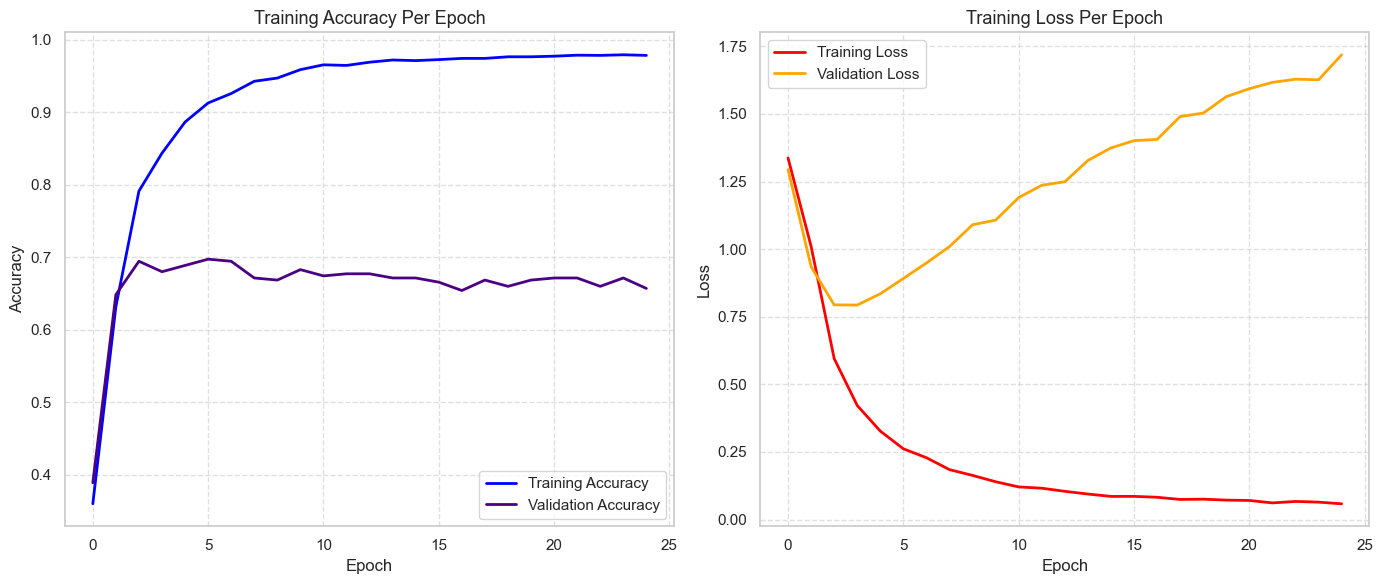

In [110]:
import matplotlib.pyplot as plt
#my plot config
plt.figure(figsize=(14,6))

#accuracy plot
plt.subplot(1,2,1)
plt.plot(training_log['epoch'], training_log['accuracy'], 
         color='blue', label='Training Accuracy', linewidth=2)
plt.plot(training_log['epoch'], training_log['val_accuracy'], 
         color='#4B0082', label='Validation Accuracy', linewidth=2)
plt.title('Training Accuracy Per Epoch', fontsize=13)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

#loss plot
plt.subplot(1,2,2)
plt.plot(training_log['epoch'], training_log['loss'], 
         color='red', label='Training Loss', linewidth=2)
plt.plot(training_log['epoch'], training_log['val_loss'], 
         color='orange', label='Validation Loss', linewidth=2)
plt.title('Training Loss Per Epoch', fontsize=13)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

What the above graphs show is that training accuracy contains to improve while validation accuracy plateaus around epoch 5-6. Meanwhile the training loss decreases smoothly but the validation loss begins to rise after the same point. THis means the model starts overfitting after a few epochs. It learns patterns specific to the training data that don't generalize to new samples. So ideally training should stop when validation accuracy peaks and validation loss begins increasing [early stopping]

---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [72]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3353,40526,"People want me to go pine ridge, little wound ...","[People, want, me, to, go, pine, ridge, ,, lit..."
1573,20716,@EurekaForbes U got to b kidding me. Anu from ...,"[@, EurekaForbes, U, got, to, b, kidding, me, ..."
870,20013,#panic Panic attack from fear of starting new ...,"[#, panic, Panic, attack, from, fear, of, star..."
2975,40148,@CNN yes. Too many cops. And too many ppl who ...,"[@, CNN, yes, ., Too, many, cops, ., And, too,..."
1987,21130,"I polished my nails, but can't find the polish...","[I, polished, my, nails, ,, but, ca, n't, find..."


In [73]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['People', 'want', 'me', 'to', 'go', 'pine', 'ridge', ',', 'little', 'wound', 'or', 'Oelrichs', '.', 'Starting', 'to', 'think', 'about', 'transferring', 'but', 'I', 'wan', 'na', 'stay', 'at', 'cloud', '.', 'Decisions', 'man', '.']),
       list(['@', 'EurekaForbes', 'U', 'got', 'to', 'b', 'kidding', 'me', '.', 'Anu', 'from', 'your', 'firm', 'responded', 'when', 'I', 'sent', 'the', 'contact', 'details', '.', '#', 'customerexperience']),
       list(['#', 'panic', 'Panic', 'attack', 'from', 'fear', 'of', 'starting', 'new', 'medication'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [74]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [75]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.65924275,  0.55661684, -0.25196978, -0.05915235,  0.00146129,
       -1.0964358 ,  0.24751176,  1.3390087 , -0.3778084 , -0.5971819 ,
       -0.23784968, -1.0459943 , -0.4421684 ,  0.2300199 , -0.2609429 ,
       -0.46198234,  0.6545697 , -0.03494804,  0.628707  , -1.1008468 ,
        0.22269036,  1.0607631 ,  0.36356753, -0.09317607,  0.28611863,
        0.01589693, -0.52010167,  0.57409453, -0.70412016, -0.28228825,
        0.25683835, -0.17529386,  0.4521861 , -0.99092305, -0.0439335 ,
        0.19525181,  0.18008812, -0.22892733, -0.13939583, -0.26962572,
       -0.08995156, -0.0352224 , -0.3982158 ,  0.01276635,  0.7452374 ,
        0.03971208, -0.8849747 , -0.06080469,  0.45827872,  0.3735719 ,
       -0.24203053, -0.52219313, -0.23181279, -0.11249124, -0.37346768,
       -0.41539866,  0.07516015, -0.1665105 , -0.18460806,  0.5374453 ,
        0.42793843,  0.02421675,  0.12380707,  0.04261349, -0.7796335 ,
        0.75943434,  0.2354598 ,  0.43622202, -1.1583399 ,  0.59

In [76]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('birthday', 0.9274043440818787),
 ('bday', 0.926395833492279),
 ('whitephosphrus', 0.9147811532020569),
 ('Makes', 0.9093856811523438),
 ('.\\nA', 0.9017956852912903),
 ('Be', 0.896330714225769),
 ('blessed', 0.8959169387817383),
 ('free', 0.8956732153892517),
 ('angry', 0.8903096914291382),
 ('blast', 0.884788990020752)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [78]:
from gensim.models import KeyedVectors
# IMPORTANT: Please make sure that you have correctly downloaded the file and put it in the correct directory
## Note: this model is huge, this will take some time ...
model_path = "./GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626911163330078),
 ('overjoyed', 0.6599287390708923),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [79]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577817320823669),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158352017402649),
 ('thanks', 0.9150083661079407),
 ('merry', 0.9053248167037964),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [81]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118191123008728),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902430415153503),
 ('crown_prince', 0.5499458909034729),
 ('prince', 0.5377322435379028),
 ('kings', 0.5236843824386597),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134939193726),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
#training word2vec on tokenized train texts
sentences = [preprocess_text(t) for t in train_df['text'].astype(str)]
w2v = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=2, epochs=10, workers=2)

#helper that gets vector for a word
def get_word_vector(w):
    if w in w2v.wv:
        return w2v.wv[w]
    else:
        return np.zeros(w2v.vector_size, dtype=float)

#sentence mean vectors
def sentence_mean_vector(s):
    toks = preprocess_text(s)
    if not toks:
        return np.zeros(w2v.vector_size)
    vecs = np.array([get_word_vector(t) for t in toks])
    return vecs.mean(axis=0)

X_train_sent_mean = np.vstack([sentence_mean_vector(s) for s in train_df['text'].astype(str)])
X_test_sent_mean  = np.vstack([sentence_mean_vector(s) for s in test_df['text'].astype(str)])

#tf-idf weighted average
tfidf_for_weights = TfidfVectorizer(tokenizer=nltk_tokenizer, max_features=10000)
tfidf_for_weights.fit(pd.concat([train_df['text'], test_df['text']]))

def sentence_tfidf_weighted_vector(s):
    toks = preprocess_text(s)
    if not toks:
        return np.zeros(w2v.vector_size)
    #computing tfidf values for tokens in this single doc
    tfidf_vec = tfidf_for_weights.transform([s])
    feature_names = tfidf_for_weights.get_feature_names_out()
    weights = {feature_names[i]: tfidf_vec[0, i] for i in tfidf_vec.nonzero()[1]}
    vecs, wts = [], []
    for t in toks:
        wt = weights.get(t, 0.0)
        if wt > 0 and t in w2v.wv:
            vecs.append(w2v.wv[t] * wt)
            wts.append(wt)
    if not vecs:
        return sentence_mean_vector(s)
    vecs = np.array(vecs)
    return vecs.sum(axis=0) / (np.sum(wts) + 1e-9)

X_train_sent_tfidf  = np.vstack([sentence_tfidf_weighted_vector(s) for s in train_df['text'].astype(str)])
X_test_sent_tfidf   = np.vstack([sentence_tfidf_weighted_vector(s) for s in test_df['text'].astype(str)])

print("Shapes mean:", X_train_sent_mean.shape, X_test_sent_mean.shape)
print("Shapes tfidf-weighted:", X_train_sent_tfidf.shape, X_test_sent_tfidf.shape)

#training a simple classifier on averaged embeddings thats TF-IDF weighted
clf_avg = MultinomialNB()
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=200)
clf.fit(X_train_sent_tfidf, y_train)
y_pred_sent = clf.predict(X_test_sent_tfidf)
print("Sentence-embedding Logistic Regression accuracy:", accuracy_score(y_test, y_pred_sent))
print(classification_report(y_test, y_pred_sent))

Shapes mean: (3613, 100) (347, 100)
Shapes tfidf-weighted: (3613, 100) (347, 100)
Sentence-embedding Logistic Regression accuracy: 0.30835734870317005
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.31      0.95      0.47       110
           2       0.33      0.03      0.05        79
           3       0.00      0.00      0.00        74

    accuracy                           0.31       347
   macro avg       0.16      0.24      0.13       347
weighted avg       0.17      0.31      0.16       347



---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](./pics/pic5.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [83]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [84]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![pic6.png](./pics/pic6.png)

In [85]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

In [86]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](./pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](./pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

In [87]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

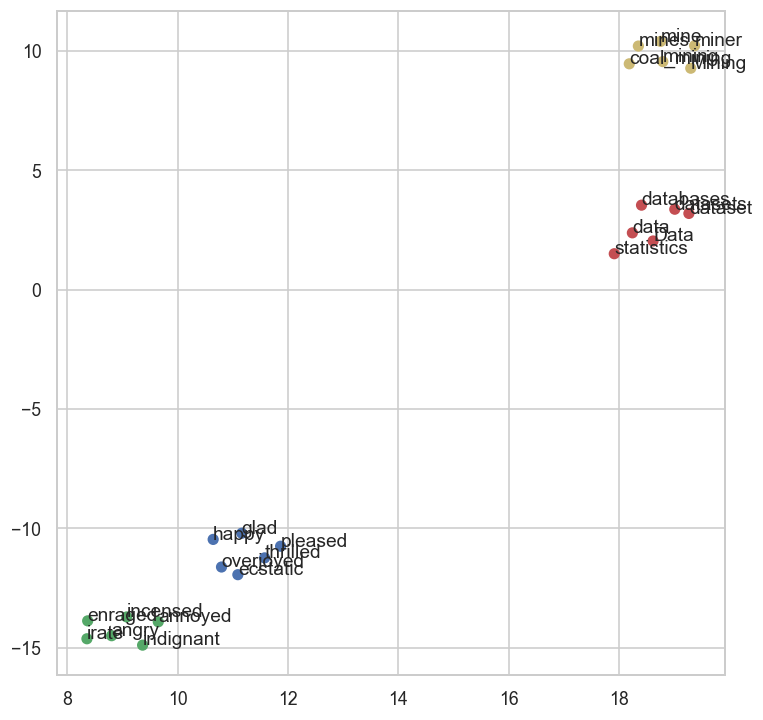

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

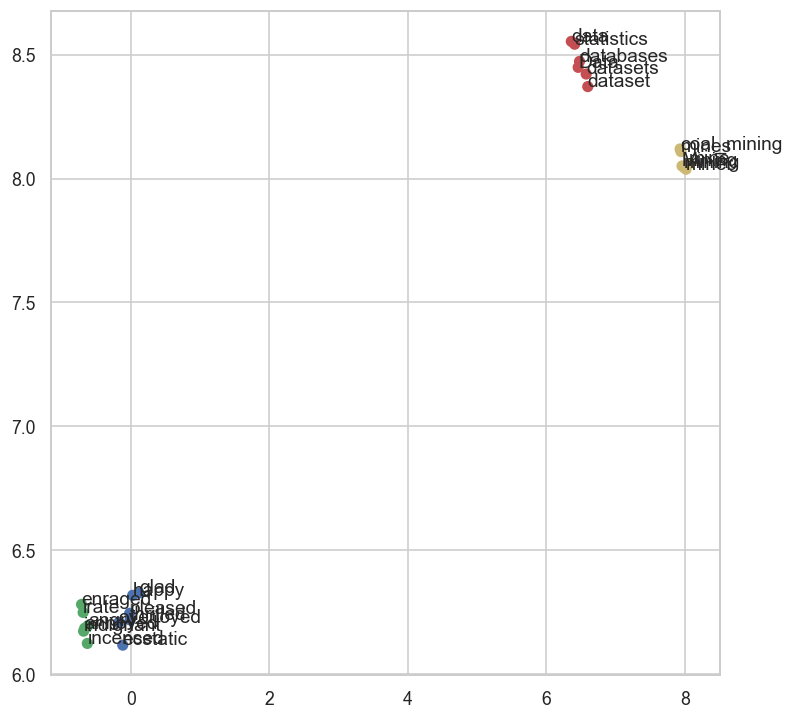

In [89]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

,Total 'happy': 16,Total 'angry': 16,Total 'sad': 16,Total 'fear': 16
0,happy,angry,sad,fear
1,glad,irate,saddening,fearful
2,pleased,enraged,Sad,fears
3,ecstatic,indignant,saddened,Fear
4,overjoyed,incensed,heartbreaking,fearing
5,thrilled,annoyed,disheartening,worry
6,satisfied,agitated,Meny_Friedman,dread
7,proud,frustrated,parishioner_Pat_Patello,feared
8,delighted,furious,saddens_me,anxiety
9,disappointed,unhappy,distressing,apprehension


Total target words collected: 64


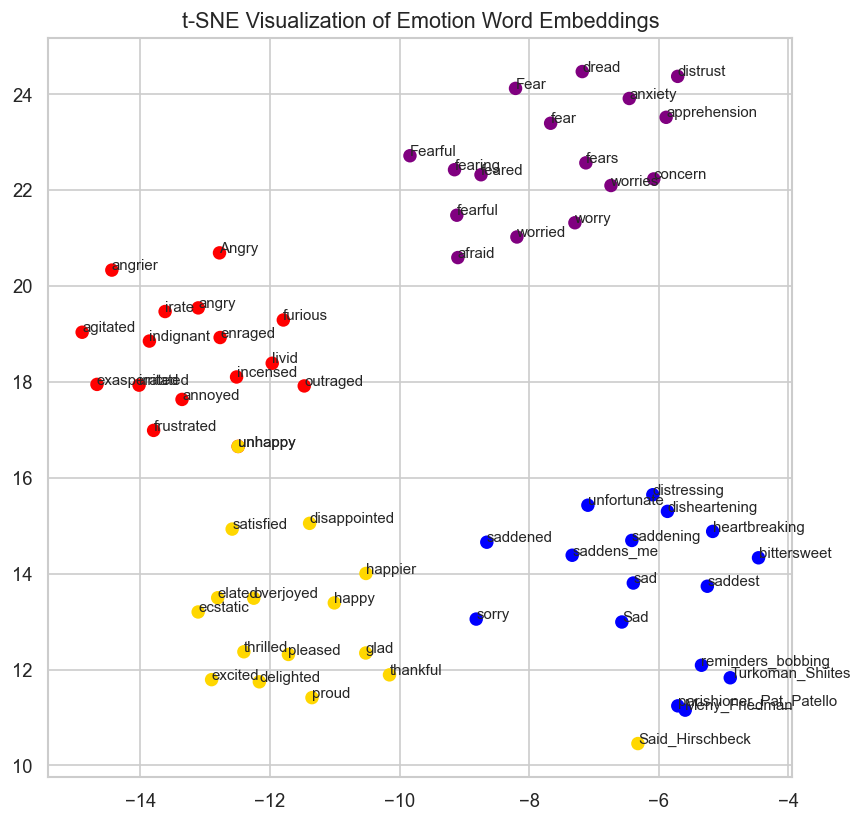

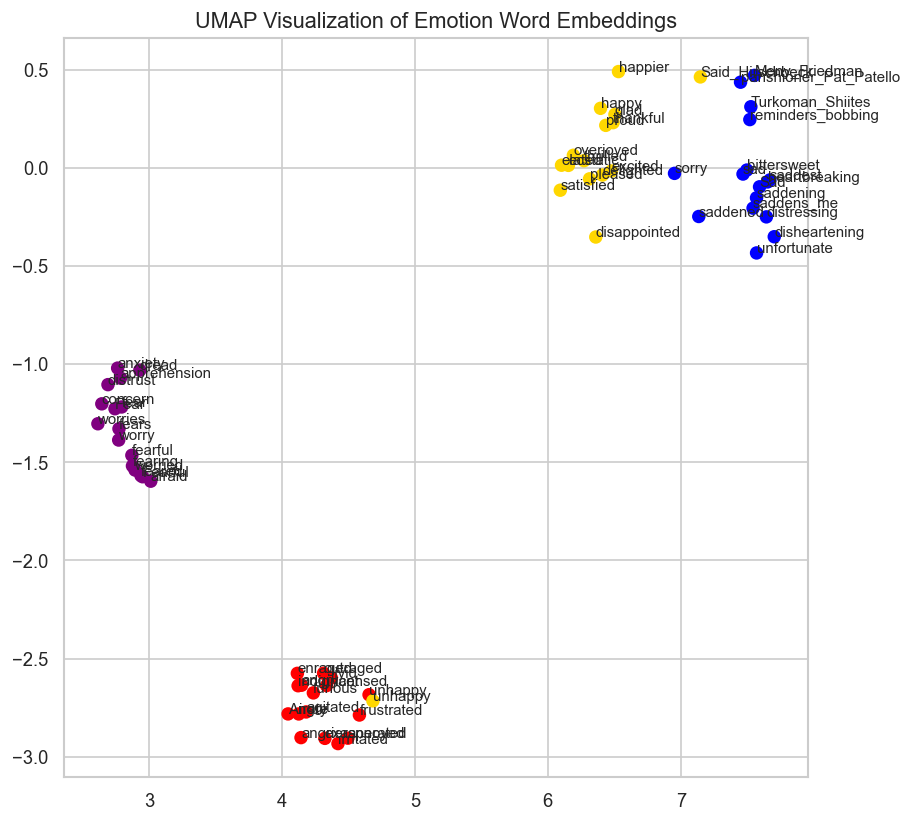

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap
import numpy as np

#the target emotion words
emotion_words = ['angry', 'happy', 'sad', 'fear']
topn = 15

#collecting top 15
angry_words = ['angry'] + [w for w, _ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [w for w, _ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words   = ['sad']   + [w for w, _ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words  = ['fear']  + [w for w, _ in w2v_google_model.most_similar('fear', topn=topn)]

#creating a dataframe because i want to neatly display the words in a table before visuals
max_len = max(len(happy_words), len(angry_words), len(sad_words), len(fear_words))

df_display = pd.DataFrame({
    f"Total 'happy': {len(happy_words)}": happy_words + ['']*(max_len - len(happy_words)),
    f"Total 'angry': {len(angry_words)}": angry_words + ['']*(max_len - len(angry_words)),
    f"Total 'sad': {len(sad_words)}": sad_words + ['']*(max_len - len(sad_words)),
    f"Total 'fear': {len(fear_words)}": fear_words + ['']*(max_len - len(fear_words)),
})

#displaying via table
pd.set_option('display.max_rows', None)
display(df_display)

target_words = angry_words + happy_words + sad_words + fear_words
print(f"Total target words collected: {len(target_words)}")  # expected ≈ 64

#color codings my words
cn = topn + 1
color = (['red'] * cn +#angry
         ['gold'] * cn +#happy
         ['blue'] * cn +#sad
         ['purple'] * cn)#fear

#preparing Word2Vec vectors
size = 200
target_size = len(target_words)
all_word = list(w2v_google_model.index_to_key)
word_train = target_words + all_word[:size]
X_train = w2v_google_model[word_train]

#t-sne
tsne = TSNE(n_components=2, metric='cosine', random_state=42)
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(8, 8), dpi=120)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color, s=50)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=9)
plt.title("t-SNE Visualization of Emotion Word Embeddings", fontsize=13)
plt.show()

#umap
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=42)
X_umap = umap_model.fit_transform(X_train)

plt.figure(figsize=(8, 8), dpi=120)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color, s=50)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=9)
plt.title("UMAP Visualization of Emotion Word Embeddings", fontsize=13)
plt.show()

Comparison between t-SNE and UMAP graphs:
+ Both the t-sne and umap are dimensionality reduction techniques that project high dimensional word embeddings [200D vectors from word2vec] into a 2d space. But they show different structures in the data which is why the two plots look different.
+ t-sne focuses more on preserving local relationships. What this means is that the words that are similar [close neighbours in embedding space] tend to form compact well separated clusters. In my t-sne plot, each emotion group [red for 'angry', gold for 'happy', blue for 'sad' and purple for 'fear'] appears as distint blobs. But the overall layout between clusters doesn't really reflect global similarity well beacuse the distances between clusters don't have much meaning.
+ The umap though, tries to balance local and global structure. It captures both close and moderately distant relationships so clusters appear more connected or overlapping. That's why in my visual it is noticable that a yellow [happy] words appearing inside the red [angry] region. It's because umap recognizes that some words are related to 'happy' and 'angry' do share similar semantic contexts like 'excited' , 'mad' or 'thrilled'. So it places them closer together. So the word 'unhappy' being within the angry clusters does make sense since its does share similar semantic context.

Overall the t-sne graph shows tigher but more isolated clusters while the umap graph shows smoother transitions and semantic overlaps between emotions. The overlap of colors [like the yellow in red] shows real linguistic relationships captured by the embeddings rather than an error. 

---